In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
hormigon = pd.read_csv('ConcreteStrengthData.csv')
hormigon

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
hormigon.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
hormigon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Con esto descarto que haya valores nulos, y ademas verifico que todos los valores son del tipo numero. 

KNN
---

En este caso, como se trata de un problema de regresion (los target no son etiquetas, sino valores numericos), voy a trabajar con k-neigthbors regressor. 

In [5]:
hormigon.keys()

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [6]:
# definio cuales son los features y los separo del target (Strength)

X = np.array(hormigon[['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']])

y = np.array(hormigon[['Strength']])

In [7]:
# preparo el dataset para entrenamiento y para testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)
# pongo shuffle=True para que se barajen los datos (mezclar las muestras)



In [8]:
print(len(X_train), len(y_train))

824 824


In [9]:
print(len(X_test), len(y_test))

206 206


In [10]:
knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
preds = knn.predict(X_test)
knn.score(X_test, y_test)

0.6857750633934651

In [12]:
for k in range(3,10):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    print(f'Score con "k" = {k} >>>', round(knn.score(X_test, y_test),3))

Score con "k" = 3 >>> 0.705
Score con "k" = 4 >>> 0.715
Score con "k" = 5 >>> 0.686
Score con "k" = 6 >>> 0.664
Score con "k" = 7 >>> 0.669
Score con "k" = 8 >>> 0.66
Score con "k" = 9 >>> 0.649


Hay un maximo con **k = 4**. 

Linear Regression
---

>Voy a representar un grafico 2D entre la la cantidad de cemento y la resistencia final

<Axes: xlabel='CementComponent ', ylabel='Strength'>

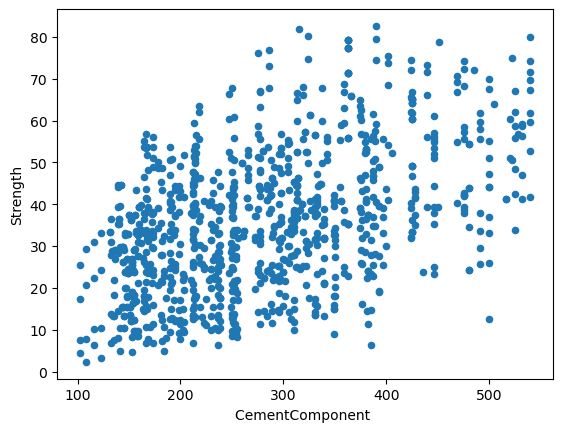

In [13]:
hormigon.plot.scatter(x='CementComponent ', y='Strength')

No parece haber una relacion lineal entre la cantidad de cemento y la resistencia...

In [14]:
from sklearn import linear_model

# creo un objeto de regresion lineal
lg = linear_model.LinearRegression()

# ajusto la regresion a los datos de entrenamiento
lg.fit(X_train, y_train)

# prediccion y testeo de los datos de testeo
round(lg.score(X_test, y_test),3)

0.584

Obtuve un mejore score con **KNN** que con regrresion lineal. 

DecisionTreeRegressor
---

In [15]:
from sklearn import tree

# creo un objeto para el modelado
clf = tree.DecisionTreeRegressor()

# ajusto el arbol a los datos de entrenamiento
clf.fit(X_train, y_train)

# prediccion y testeo de los datos de testeo
round(clf.score(X_test, y_test),3)


0.83

Hasta ahora el mejor score lo obtuve con DecisionTreeRegressor

SVM
---

In [16]:
type(y_test)

numpy.ndarray

In [17]:
from sklearn import svm

# creo el objeto de clase svm, con 3 kernels distintos
svr_rbf = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = svm.SVR(kernel="linear", C=100, gamma="auto")
svr_poly = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X_train, np.ravel(y_train, order='C'))
print(round(svr_rbf.score(X_test, np.ravel(y_test, order='C')),3))

svr_lin.fit(X_train, np.ravel(y_train, order='C'))
print(round(svr_lin.score(X_test, np.ravel(y_test, order='C')),3))

"""
Este modelo insume muchos recursos de maquina... no se si el resultado es bueno.
svr_poly.fit(X_train, np.ravel(y_train, order='C'))
print(round(svr_poly.score(X_test, np.ravel(y_test, order='C')),3))
"""

0.402
-13.851


"\nEste modelo insume muchos recursos de maquina... no se si el resultado es bueno.\nsvr_poly.fit(X_train, np.ravel(y_train, order='C'))\nprint(round(svr_poly.score(X_test, np.ravel(y_test, order='C')),3))\n"